---
title: Introduction to Centroid Clustering using Rice Grain Model
subtitle: AgroGeo24 Clustering Workshop Part 2
---

(part2-links)=
:::{note} Run in Google Colab
This is computational article that can be executed on Google Colab:\
[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1qP1e5OIxUWA5n9YtHhWU6pjrfiIataej?usp=sharing)

**Data Files**
- [AgroGeo24_WS_Part_2_Rice_Grain_Model.jpg](./data/part_2/AgroGeo24_WS_Part_2_Rice_Grain_Model.jpg)
:::

**Please save a copy of this notebook in your Google Drive before running**

Click "File" and "Save a copy in Drive" to save a copy of this notebook to your own Google Drive.

This workshop is accompanied by a live presentation from the workshop leader which gives context and background on the datasets provided and also any follow on conclusions and uses with links to relevant papers and articles.

All data for all parts of this workshop are available [here](https://drive.google.com/drive/folders/1YtDP3x0FxpJjjxD7QM_pOxXvU3VKy9so?usp=sharing). Please download these to a local directory on your computer if you have not already.

In this part of the workshop you will be provided with a Black and White image of Rice.

1.  The Rice Grains are randomly orientated
2.  The background changes from light to dark in intensity

The image can be considered analogous to a remote sensing image, with a variable background and anomalies superimposed within this changing background. Here the "data" are called Pixel Intensity and range from 1 - 256 defining the colour from black to white.

The aim of this workshop is to determine the appropriate number of clusters for this image by considering the Elbow and Silhouette scores and MCASD metrics.KMeans clustering is the clustering methodology.

The input file name is: **"AgroGeo24_WS_Part_2_Rice_Grain_Model.jpg"** and should be located in the folder named "Part 2" of the data directory provided.

Please following along with the workshop leader in the first instance until you are familiar with using Google Colab environment.

No coding experience is required to run this code. All the code contains comments describing what each line does. Please click "Show Code" on any section to view the code.

Please feel free to ask questions if you don't understand any parts.

# Section 0

This section sets up the Python environment for the clustering analysis.

It imports essential libraries such as Pandas for data manipulation, NumPy for numerical operations, Matplotlib for data visualization, scikit-learn for machine learning tools, and other supporting libraries.

Additionally, it configures the display.

The code also imports specific functions and modules required for the clustering analysis, such as KMeans.

Finally, it sets up tools for working with images, zip files, and file uploads in Google Colab. This preparation ensures that the subsequent code can efficiently perform clustering analysis and handle related tasks.

Press the play button below:

# ⬇

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio.v2 as imageio
import matplotlib
import imageio.v2 as imageio
import io
import os
import re

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from IPython.display import display, clear_output
from PIL import Image
from zipfile import ZipFile
from google.colab import files


# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Section 1

Now we are going to read in the data from your local device. If you have not yet downloaded the necessary data, please do so from [here](https://drive.google.com/drive/folders/1YtDP3x0FxpJjjxD7QM_pOxXvU3VKy9so?usp=sharing).

The image is in greyscale format.

Press the play button below to select the correct file. It should be called: **"AgroGeo24_WS_Part_2_Rice_Grain_Mode.jpg"**

You will see a button "Choose files". Click this and navigate to where this file is stored on your machine. Then highlight it and click "open".

You will see a progress message as the file is uploaded to this Google Colab environment.

In [ ]:
# @title
#### Section 1: Import Grayscale .jpg image  ####

# Prompt the user to upload a file
uploaded = files.upload()

# Get the uploaded file name
image_file_name = list(uploaded.keys())[0]

# Extract the filename without the extension
image_file_name_without_extension = os.path.splitext(image_file_name)[0]

# Remove numerical suffixes from the filename
image_file_name_without_extension = re.sub(r'\(\d+\)', '', image_file_name_without_extension)
image_file_name_without_extension = re.sub(r'\(\ \)', '', image_file_name_without_extension)

# Read the image into a DataFrame
image = Image.open(io.BytesIO(uploaded[image_file_name])) # Convert to grayscale
image_array = np.array(image)[:,:,0]
height, width = image_array.shape
coordinates = np.array(np.meshgrid(np.arange(width), np.arange(height))).T.reshape(-1, 2)
pixel_values = image_array.flatten()

# Create DataFrame with X Coordinate, Y Coordinate, and pixel intensity
df_image = pd.DataFrame({
    'X': coordinates[:, 1],
    'Y': coordinates[:, 0],
    'Pixel Intensity': pixel_values
})

Saving AgroGeo24_WS_Part_2_Rice_Grain_Model.jpg to AgroGeo24_WS_Part_2_Rice_Grain_Model.jpg


Excellent. You have now loaded the image into the Google Colab environment and are ready to take a look at the data.

# Section 2

We now visualize the image. The color intensity in each plot reflects the values of the corresponding data column.

This visualization provides an initial exploration of the image and how the pixel intensities are distributed in the "geographical" space, setting the stage for further analysis and insights.


Press the play button to run the code

# ⬇

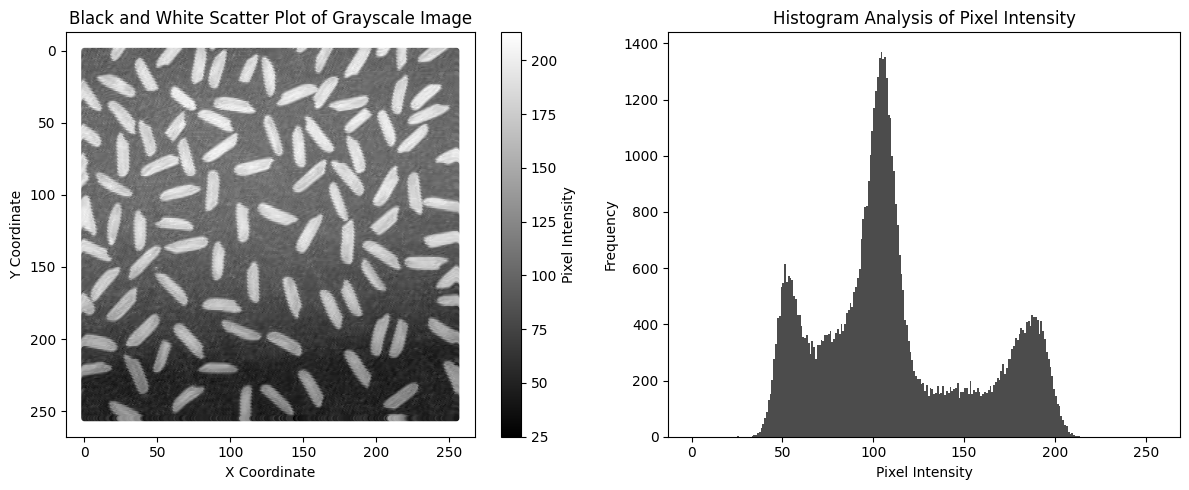

In [ ]:
# @title
#### Section 2: Plot Grayscale Image as Black and White Scatter Plot with Histogram ####

# Set up a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Black and White Scatter Plot
scatter_plot = axes[0].scatter(df_image['X'], df_image['Y'], c=df_image['Pixel Intensity'], cmap='gray', marker='o', s=10)
axes[0].set_title('Black and White Scatter Plot of Grayscale Image')
axes[0].set_xlabel('X Coordinate')
axes[0].set_ylabel('Y Coordinate')
axes[0].invert_yaxis()  # Invert the y-axis to match the image orientation
cbar = plt.colorbar(scatter_plot, ax=axes[0], orientation='vertical')
cbar.set_label('Pixel Intensity')

# Plot 2: Histogram Analysis of Pixel Intensity
axes[1].hist(df_image['Pixel Intensity'], bins=256, range=(0, 256), color='black', alpha=0.7)
axes[1].set_title('Histogram Analysis of Pixel Intensity')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Section 3

We now visualize the image again but this time we're going to let you try to cluster this data using your intutition!

Using the data above (image and histogram) in Section 2, try to decide the number and location of the cluster centers.

The code will ask you for the number of clusters, and then for their cluster center position.

It will then calculate the quantizitation error, which is the mean of the distance between each data point (pixel intensity) and it's closest cluster center that you have picked.

One of the aims of clustering is to reduce this error.

Run this code a few times and try to get a low quantization error as you can with as few clusters as you can. Remember, we are trying to describe this full dataset with just a few data points (cluster centers).

Hopefully you will see that the human brain is already quite good at clustering!

How many clusters do you think there are?? And what are their cluster centers.

Once you are happy with your selection, please move on to the next section, where we will use traditional Elbow and Silhoutte and more modern MCASD to see how close you can get!


Press the play button to get started. Press the play button again to re-run the code (note it will overwrite each time you run the code)

# ⬇

Enter the number of clusters: 5
Enter value for center of cluster 0 (between 0 and 256): 60
Enter value for center of cluster 1 (between 0 and 256): 120
Enter value for center of cluster 2 (between 0 and 256): 140
Enter value for center of cluster 3 (between 0 and 256): 180
Enter value for center of cluster 4 (between 0 and 256): 200

The quantization error for this attempt is: 12.2601



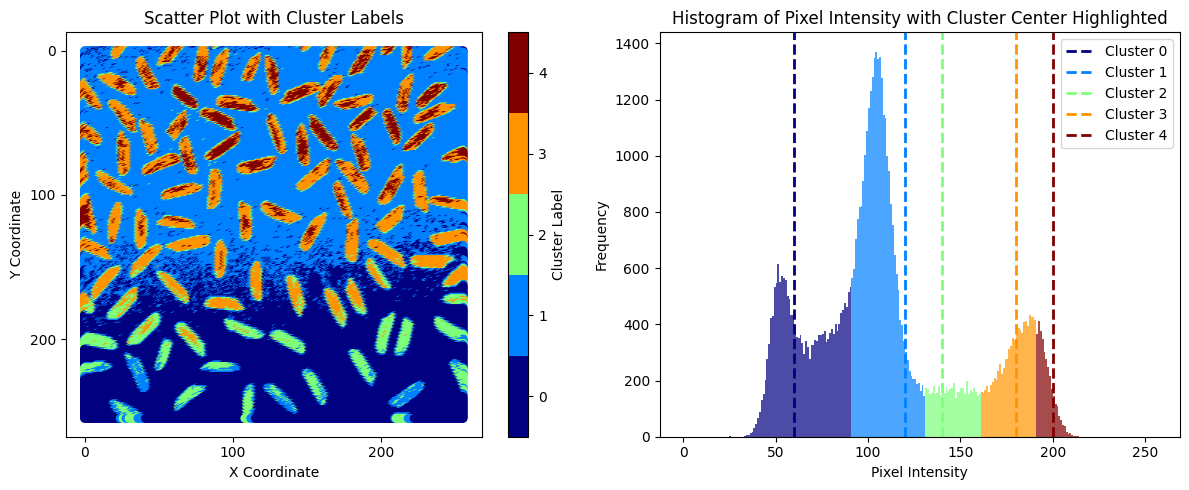

In [ ]:
# @title
#### Section 3: KMeans Clustering and Visualization ####

# Extract the Pixel Intensity data
coordinates = df_image.iloc[:, :2]

# Extract the Pixel Intensity data
remaining_data = df_image.iloc[:, 2:3]
clustering_data = df_image['Pixel Intensity'].values.reshape(-1, 1)


num_clusters = []
# Get the number of clusters from the user
num_clusters = int(input("Enter the number of clusters: "))

# Initialize variables to store user input for cluster centers
cluster_centers = []

# Use a while loop to repeatedly prompt the user for input until valid values are entered
while True:
    try:
        # Get input from the user for each cluster center
        for i in range(num_clusters):
            center = int(input(f"Enter value for center of cluster {i} (between 0 and 256): "))
            cluster_centers.append(center)

        # Break out of the loop if the input is valid
        break

    except ValueError as e:
        print(f"Error: {e}. Please enter valid numeric values.")

# Convert cluster_centers to a numpy array
cluster_centers = np.array(cluster_centers).reshape(-1, 1)

# Calculate distances from each data point to each cluster center
distances = np.abs(clustering_data - cluster_centers.T)

# Calculate the mean of minimum distances
min_distance_indices = np.argmin(distances, axis=1)
min_distances = distances[np.arange(len(distances)), min_distance_indices]
mean_min_distance = np.mean(min_distances).round(4)

# Display the mean of minimum distances
print(f"\nThe quantization error for this attempt is: {mean_min_distance}\n")

# Store original inputs for repeated attempts
original_cluster_centers = cluster_centers.copy()
original_mean_min_distance = mean_min_distance

# Assign each data point to the cluster with the nearest cluster center
cluster_labels = np.argmin(distances, axis=1)

### Section 3.2 Sort the Cluster centers ###

# Calculate the distances of cluster centers from the origin (0)
distances_from_origin = np.sqrt(np.sum(cluster_centers ** 2, axis=1))

# Sort cluster centers based on distances from the origin
sorted_indices = np.argsort(distances_from_origin)

# Sort cluster centers and labels
sorted_cluster_centers = cluster_centers[sorted_indices]
sorted_cluster_labels = np.zeros_like(cluster_labels)

# Relabel the cluster labels based on the sorted order
for new_label, old_label in enumerate(sorted_indices):
    sorted_cluster_labels[cluster_labels == old_label] = new_label

# Calculate the count of each cluster label
cluster_labels_count = dict(zip(*np.unique(sorted_cluster_labels, return_counts=True)))

# Create a DataFrame with X, Y, Cluster, and Remaining Data
clustered_data_df = pd.DataFrame({
    'X': coordinates['X'],
    'Y': coordinates['Y'],
    'Cluster Number': sorted_cluster_labels,
    **{f'{col}': remaining_data[col] for col in remaining_data.columns}
})

### Section 3.3 Plot Human Clustering results ###
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Scatter Plot with Cluster Labels
scatter = ax1.scatter(coordinates['X'], coordinates['Y'], c=sorted_cluster_labels, cmap='jet', marker='o', s=30)

# Set plot properties for Plot 1
ax1.set_title(f'Scatter Plot with Cluster Labels')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax1.invert_yaxis()  # Invert the y-axis to match the image orientation

# Create a discrete color map with the number of clusters for Plot 1
cmap_discrete = matplotlib.colormaps.get_cmap('jet')

# Define boundaries for the discrete color map for Plot 1
boundaries = np.arange(-0.5, num_clusters, 1)

# Create a BoundaryNorm for the color map for Plot 1
norm_discrete = mcolors.BoundaryNorm(boundaries, cmap_discrete.N, clip=True)

# Add a discrete color bar with integer cluster labels for Plot 1
cbar = plt.colorbar(scatter, ax=ax1, ticks=np.arange(num_clusters), cmap=cmap_discrete, norm=norm_discrete,
                    boundaries=boundaries)
cbar.set_label('Cluster Label')

# Set the number of tick marks on the X and Y axes for Plot 1
ax1.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=3))

for cluster_label, cluster_center in zip(cluster_labels_count.keys(), sorted_cluster_centers):
    color = cmap_discrete(
        cluster_label / (num_clusters - 1) if num_clusters - 1 != 0 else 0.5)  # Use the same cmap for pixel intensities
    # Get the pixel intensities assigned to the current cluster
    cluster_pixel_intensity = clustered_data_df[
        clustered_data_df['Cluster Number'] == cluster_label]['Pixel Intensity']
    # Calculate color bins based on the minimum and maximum pixel intensity values
    color_bins = [cluster_pixel_intensity.min(), cluster_pixel_intensity.max()]
    # Plot the histogram with specific bin edges and color
    hist, bin_edges, _ = ax2.hist(cluster_pixel_intensity, bins=256, range=(0, 256), alpha=0.7, color=color)
    ax2.axvline(x=cluster_center, color=color, linestyle='dashed', linewidth=2,
                label=f'Cluster {cluster_label}')

# Set plot properties for Plot 2
ax2.set_title('Histogram of Pixel Intensity with Cluster Center Highlighted')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')

# Add a legend to distinguish cluster center lines
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Section 4

In this section, we divide our dataset into two key components: coordinates and remaining data. The first two columns, containing coordinate information, are isolated to construct the "Coordinates" DataFrame. Simultaneously, the remaining data, excluding the initial two columns forms the "Remaining Data" DataFrame.

This separation serves a pivotal purpose—clustering analysis will solely operate on the remaining data. Subsequently, the cluster labels obtained can be associated with their respective X and Y coordinates. This distinction is fundamental for generating geographical cluster maps, allowing us to visually interpret and understand the spatial distribution of clusters across the dataset.

This section  also performs data normalization, a crucial step before applying clustering algorithms.

The resulting normalized data is displayed, providing an insight into the standardized values across the dataset.

Normalization enhances the accuracy of clustering algorithms, ensuring that features with different scales contribute equally to the clustering process.


Press the play button to run the code

# ⬇


In [ ]:
# @title
#### Section 4 Separate the Data for clustering ####

# Extract coordinate information (assuming it's in the first two columns)
coordinates = df_image.iloc[:, :2]

# Extract the Pixel Intensity data
remaining_data = df_image.iloc[:, 2:3]

# Display the Coordinates DataFrame
print("\nCoordinates:")
print(coordinates.head(10).to_string(index=False))  # Use to_string to prevent truncation
print(f"Number of rows: {df_image.shape[0]}")

# Display the Remaining Data DataFrame
print("\nRemaining Data:")
print(remaining_data.head(10).to_string(index=False))  # Use to_string to prevent truncation
print(f"Number of rows: {df_image.shape[0]}")

# Custom normalization using MinMaxScaler
min_vals = remaining_data.min()
max_vals = remaining_data.max()
remaining_data_column = ['Pixel Intensity']

normalized_data = (remaining_data - min_vals) / (max_vals - min_vals)

# Round the normalized data to 4 decimal places
normalized_data = normalized_data.round(4)

# Convert the rounded normalized data back to a DataFrame and set column names
normalized_df = pd.DataFrame(normalized_data, columns=remaining_data_column)

# Display the rounded normalized data
print("\nNormalized Data:")
print(normalized_df.head(10).to_string(index=False))  # Use to_string to prevent truncation
print(f"Number of rows: {df_image.shape[0]}")


Coordinates:
 X  Y
 0  0
 1  0
 2  0
 3  0
 4  0
 5  0
 6  0
 7  0
 8  0
 9  0
Number of rows: 65536

Remaining Data:
 Pixel Intensity
             116
              96
             101
              96
             108
             108
              79
              91
              91
             112
Number of rows: 65536

Normalized Data:
 Pixel Intensity
          0.4840
          0.3777
          0.4043
          0.3777
          0.4415
          0.4415
          0.2872
          0.3511
          0.3511
          0.4628
Number of rows: 65536


# Section 5

This section guides the user in determining the optimal number of clusters (k) for the K-Means algorithm by utilizing both the Elbow Method and Silhouette Scores.

After specifying the maximum number of clusters to consider, the code calculates the Within-Cluster Sum of Squares (WCSS) distance using the Elbow Method. The Elbow Method graph illustrates the trade-off between clustering complexity and WCSS reduction, helping identify an optimal k value.

Simultaneously, Silhouette Scores, a measure of how well-separated clusters are, are computed and presented on the same graph. Silhouette Scores range from -1 to 1, where higher scores indicate better-defined clusters.

When assessing the graph, users should look for the "elbow" point where WCSS plateaus, suggesting diminishing returns with additional clusters.

Additionally, a high Silhouette Score at the "elbow" reinforces the choice, ensuring a balance between compact clusters and distinct cluster boundaries for effective clustering.

When running the cell, you will be prompted to enter the max number of clusters. (i.e., 10).


Press the play button to run the code.

# ⬇

Enter the maximum number of clusters for the Elbow Method: 10


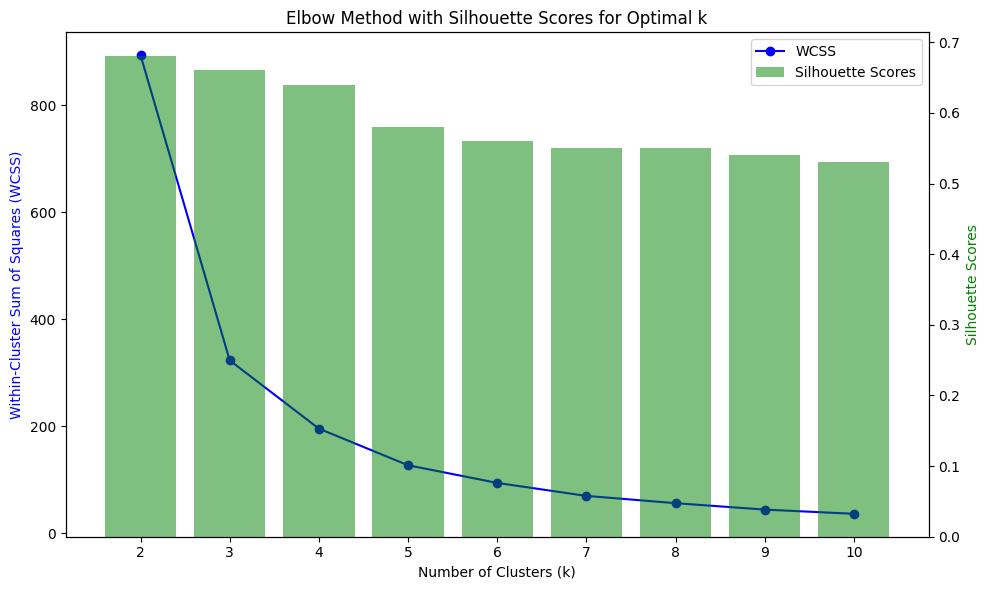

In [ ]:
# @title
#### Section 5 Elbow Method with Silhouette Scores ####

# Prompt the user to choose the maximum number of clusters for the Elbow Method
max_clusters_elbow = int(input("Enter the maximum number of clusters for the Elbow Method: "))

# Calculate the within-cluster sum of squares (WCSS) and Silhouette Scores for different values of k
wcss = []
silhouette = []
for k in range(2, max_clusters_elbow + 1):
    kmeans = KMeans(n_clusters=k, n_init=1, init='k-means++')
    kmeans.fit(normalized_data)
    sscore = round(silhouette_score(normalized_data, kmeans.labels_), 2)
    silhouette.append(sscore)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph with Silhouette Scores as a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot WCSS on the left y-axis
ax1.plot(range(2, max_clusters_elbow + 1), wcss, marker='o', color='blue', label='WCSS')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color='blue')

# Set the x-axis ticks to show only integers
plt.xticks(range(2, max_clusters_elbow + 1))

# Create a second y-axis for Silhouette Scores
ax2 = ax1.twinx()
ax2.bar(range(2, max_clusters_elbow + 1), silhouette, color='green', alpha=0.5, label='Silhouette Scores')
ax2.set_ylabel('Silhouette Scores', color='green')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Elbow Method with Silhouette Scores for Optimal k')
fig.tight_layout()
plt.show()


# Section 6

In this section, users will perform K-Means clustering on the data. The optimal number of clusters (k) can be determined by referencing the results from the previous Elbow Method and Silhouette Scores analysis (Section 5). After entering the desired number of clusters, the code applies K-Means clustering and displays key information.

The results include a count of occurrences for each cluster label via a plot of the classified image and histograph.

You will be prompted to enter the number of clusters, which should be based on the Elbow and Silhouette results, but feel free to run this code a few times for various number of clusters and take a look at the results!


Press the play button to run the code.

# ⬇

Enter the number of clusters for K-Means: 5

Count of Each Cluster Label:
Cluster 0: 11044 occurrences
Cluster 1: 11304 occurrences
Cluster 2: 24961 occurrences
Cluster 3: 6485 occurrences
Cluster 4: 11742 occurrences

Cluster Centers: [ 54.75  83.22 106.29 143.68 183.97]

The quantization error for this attempt is: 6.7965



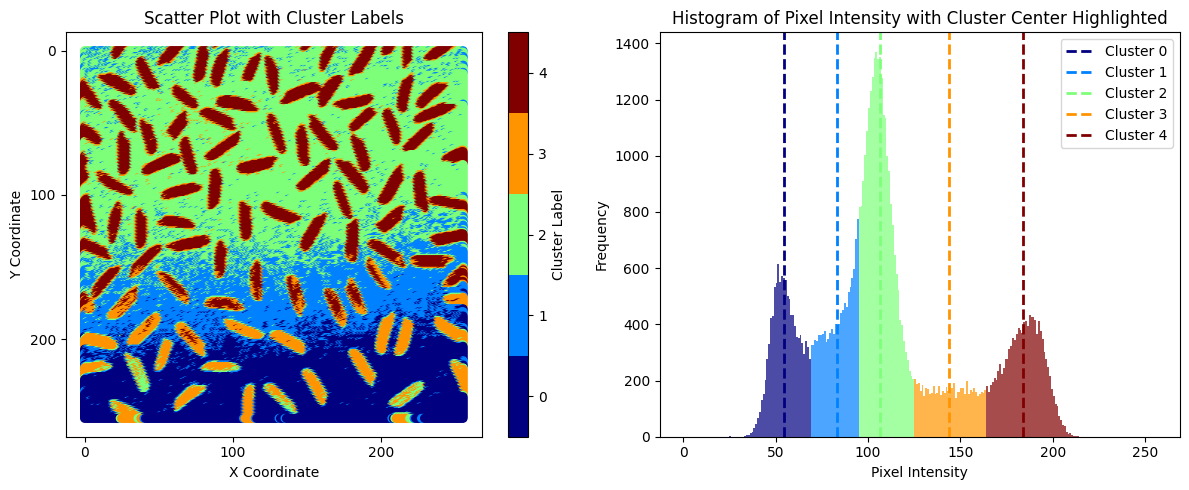

In [ ]:
# @title
##### Section 6 K Means Clustering ####

### Section 6.1 Perform K Means Clustering ###

# Prompt the user to choose the number of clusters for K-Means
num_clusters = int(input("Enter the number of clusters for K-Means: "))

# Initialize the K-Means model
kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init=1)

# Fit the K-Means model to the normalized data
kmeans.fit(normalized_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

### Section 6.2 Sort the Cluster centers ###

# Calculate the distances of cluster centers from the origin (0, 0)
distances_from_origin = np.sqrt(np.sum(cluster_centers ** 2, axis=1))

# Sort cluster centers based on distances from the origin
sorted_indices = np.argsort(distances_from_origin)

# Sort cluster centers and labels
sorted_cluster_centers = cluster_centers[sorted_indices]
sorted_cluster_labels = np.zeros_like(cluster_labels)

# Relabel the cluster labels based on the sorted order
for new_label, old_label in enumerate(sorted_indices):
    sorted_cluster_labels[cluster_labels == old_label] = new_label

# Calculate the count of each cluster label
cluster_labels_count = dict(zip(*np.unique(sorted_cluster_labels, return_counts=True)))

### Section 6.3 Denormalize the cluster centers ###

# Denormalize the data using the inverse transformation
cluster_centers_original_scale = sorted_cluster_centers * (max_vals.values - min_vals.values) + min_vals.values

clustering_data = df_image['Pixel Intensity'].values.reshape(-1, 1)
# Calculate distances from each data point to each cluster center
distances = np.abs(clustering_data - cluster_centers_original_scale.T)

# Calculate the mean of minimum distances
min_distance_indices = np.argmin(distances, axis=1)
min_distances = distances[np.arange(len(distances)), min_distance_indices]
mean_min_distance = np.mean(min_distances).round(4)

### Section 6.4 Display Clustering counts for visual QC ###

# Display the count of each cluster label
print("\nCount of Each Cluster Label:")
for label, count in cluster_labels_count.items():
    print(f"Cluster {label}: {count} occurrences")

print(f"\nCluster Centers: {cluster_centers_original_scale.round(2).flatten()}")

# Display the mean of minimum distances
print(f"\nThe quantization error for this attempt is: {mean_min_distance}\n")

### Section 6.5 Save results to Data Frame ###

# Create a DataFrame with X, Y, Cluster, and Remaining Data
clustered_data_df = pd.DataFrame({
    'X': coordinates['X'],
    'Y': coordinates['Y'],
    'Cluster Number': sorted_cluster_labels,
    **{f'{col}': remaining_data[col] for col in remaining_data.columns}
})
clustered_data_df = clustered_data_df.round(4)

# Create a DataFrame with Cluster center data
center_data_df = pd.DataFrame(cluster_centers_original_scale, columns=remaining_data.columns)

# Add a new column 'Cluster Number' to indicate the cluster number for each row
center_data_df.insert(0, 'Cluster Number', range(num_clusters))
center_data_df = center_data_df.round(4)

### Section 6.6 Plot KMeans Clustering results ###
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Scatter Plot with Cluster Labels
scatter = ax1.scatter(coordinates['X'], coordinates['Y'], c=sorted_cluster_labels, cmap='jet', marker='o', s=30)

# Set plot properties for Plot 1
ax1.set_title(f'Scatter Plot with Cluster Labels')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax1.invert_yaxis()  # Invert the y-axis to match the image orientation

# Create a discrete color map with the number of clusters for Plot 1
cmap_discrete = matplotlib.colormaps.get_cmap('jet')

# Define boundaries for the discrete color map for Plot 1
boundaries = np.arange(-0.5, num_clusters, 1)

# Create a BoundaryNorm for the color map for Plot 1
norm_discrete = mcolors.BoundaryNorm(boundaries, cmap_discrete.N, clip=True)

# Add a discrete color bar with integer cluster labels for Plot 1
cbar = plt.colorbar(scatter, ax=ax1, ticks=np.arange(num_clusters), cmap=cmap_discrete, norm=norm_discrete, boundaries=boundaries)
cbar.set_label('Cluster Label')

# Set the number of tick marks on the X and Y axes for Plot 1
ax1.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=3))

for cluster_label, cluster_center in zip(cluster_labels_count.keys(), cluster_centers_original_scale):
    color = cmap_discrete(cluster_label / (num_clusters - 1) if num_clusters - 1 != 0 else 0.5)  # Use the same cmap for pixel intensities
    # Get the pixel intensities assigned to the current cluster
    cluster_pixel_intensity = clustered_data_df[clustered_data_df['Cluster Number'] == cluster_label]['Pixel Intensity']
    # Calculate color bins based on the minimum and maximum pixel intensity values
    color_bins = [cluster_pixel_intensity.min(), cluster_pixel_intensity.max()]
    # Plot the histogram with specific bin edges and color
    hist, bin_edges, _ = ax2.hist(cluster_pixel_intensity, bins=256, range=(0, 256), alpha=0.7, color = color)
    ax2.axvline(x=cluster_center, color=color, linestyle='dashed', linewidth=2, label=f'Cluster {cluster_label}')

# Set plot properties for Plot 2
ax2.set_title('Histogram of Pixel Intensity with Cluster Center Highlighted')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')

# Add a legend to distinguish cluster center lines
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Section 7

This section applies the MCASD (Multiple Cluster Average Standard Deviation) method, designed to aid participants in identifying the optimal number of clusters for their dataset.

MCASD was first published as a method by [O'Leary et al 2023](https://doi.org/10.1016/j.geoderma.2023.116348).

MCASD evaluates the stability of cluster centers across multiple attempts and cluster numbers. Participants will input the maximum number of clusters and the maximum number of attempts per cluster.

The code loops through different cluster numbers, applying K-Means clustering multiple times to analyze stability.

The results include GIFs illustrating scatter plots and line plots for each attempt. Additionally, MCASD metrics are calculated, providing insights into the stability and consistency of clusters. A line plot visualizes the MCASD metric across various cluster numbers, aiding participants in selecting the optimal cluster count.

**All results, including csv files, plots and gifs, are compressed into a zip file for easy download**

Please save this ZIP file to "Part 2" of the data directory you were provided with and unzip it to view the outputs from MCASD analysis.

The ultimate goal is to assist participants in making informed decisions about the optimal number of clusters for their specific dataset.

When running the cell, you will be prompted to enter the number of max number of clusters (i.e., 10) and max attempts (i.e., 10). Note this might take some time depending on the max number of clusters and max attempts chosen.


Press the play button to run the code.
# ⬇

Enter the maximum number of clusters for MCASD Method: 10
Enter the maximum number of attempts for MCASD Method: 10

Calculating MCASD Metrics...

MCASD Method clustering complete.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

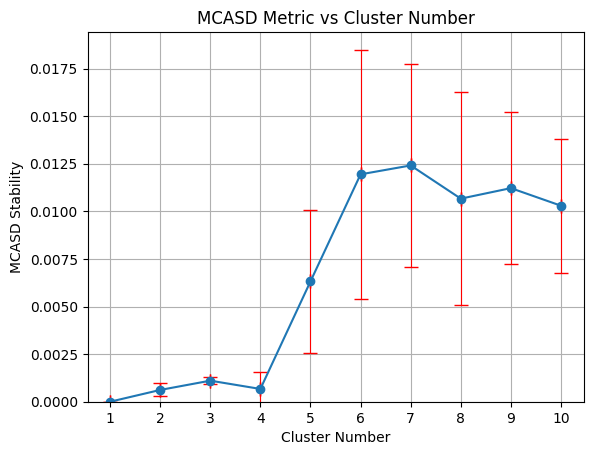

In [ ]:
# @title
#### Section 7 MCASD Method ####
### Section 7.1 Get information from the user ###

# Prompt the user for the maximum number of clusters for MCASD Method
max_num_clusters = int(input("Enter the maximum number of clusters for MCASD Method: "))
# Prompt the user for the maximum number of attempts for MCASD Method
max_attempts = int(input("Enter the maximum number of attempts for MCASD Method: "))

### Section 7.2 Loop for MCASD Method ###
# Create a DataFrame to store MCASD Metrics
mcasd_metrics_df = pd.DataFrame(index=['MCASD Metric', 'MCASD Error'], columns=range(1, max_num_clusters + 1))

print(f"\nCalculating MCASD Metrics...")

# Create a zip file to store all results
zip_filename = f'AgroGeo24_WS_Part_2_kmeans_plots.zip'
with ZipFile(zip_filename, 'w') as zip_file:

    # Loop through the various number of clusters
    for num_clusters in range(1, max_num_clusters + 1):
        images_attempt = []  # List to store images for the current attempt
        distances_df = pd.DataFrame()  # Initialize distances DataFrame

        # Cluster the data a user specified number of times (Attempts)
        for attempt in range(1, max_attempts + 1):
            #print(f"\nNumber of Clusters: {num_clusters}: Attempt {attempt} of {max_attempts}")

            # Initialize the K-Means model
            kmeans = KMeans(n_clusters=num_clusters, n_init=1, init='k-means++')

            # Fit the K-Means model to the normalized data
            kmeans.fit(normalized_data)

            # Get the cluster labels for each data point
            cluster_labels = kmeans.labels_

            # Get the cluster centers
            cluster_centers = kmeans.cluster_centers_

            ### Section 7.2.1 Sort the Cluster centers ###

            # Calculate the distances of cluster centers from the origin (0, 0)
            distances_from_origin = np.sqrt(np.sum(cluster_centers ** 2, axis=1))

            # Sort cluster centers based on distances from the origin
            sorted_indices = np.argsort(distances_from_origin)

            # Sort cluster centers and labels
            sorted_cluster_centers = cluster_centers[sorted_indices]
            sorted_cluster_labels = np.zeros_like(cluster_labels)

            # Relabel the cluster labels based on the sorted order
            for i, new_label in enumerate(np.arange(num_clusters)):
                old_label = sorted_indices[i]
                sorted_cluster_labels[cluster_labels == old_label] = new_label

            ### Section 7.2.2 Calculate the distance (in the dataspace) between each datapoint and its closest cluster center ###

            # Calculate the distances between cluster centers and data
            distances = np.linalg.norm(normalized_data.values[:, np.newaxis, :] - cluster_centers, axis=-1)

            # Get the smallest distance for each data point
            min_distances = np.min(distances, axis=1)

            # Create a DataFrame for distances with only the smallest distances
            new_column = pd.DataFrame(min_distances, columns=[f'Attempt_{attempt}'])

            # Append the new column to the existing distances_df
            distances_df = pd.concat([distances_df, new_column], axis=1)

            # Calculate the count of each cluster label
            cluster_labels_count = dict(zip(*np.unique(sorted_cluster_labels, return_counts=True)))

            # Create a DataFrame with X, Y, Cluster, and Remaining Data
            clustered_data_df = pd.DataFrame({
                'X': coordinates['X'],
                'Y': coordinates['Y'],
                'Cluster Number': sorted_cluster_labels,
                **{f'{col}': remaining_data[col] for col in remaining_data.columns}
            })
            clustered_data_df = clustered_data_df.round(4)

            ### Section 7.2.3 Denormalize the cluster centers ###

            cluster_centers_original_scale = sorted_cluster_centers * (max_vals.values - min_vals.values) + min_vals.values

            ### Section 8.2.4 Create and save plots for later GIF creation ###

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            # Plot 1: Scatter Plot with Cluster Labels
            scatter = ax1.scatter(coordinates['X'], coordinates['Y'], c=sorted_cluster_labels, cmap='jet', marker='o', s=30)

            # Set plot properties for Plot 1
            ax1.set_title(f'Scatter Plot with Cluster Labels: {num_clusters} Clusters, Attempt {attempt}')
            ax1.set_xlabel('X Coordinate')
            ax1.set_ylabel('Y Coordinate')
            ax1.invert_yaxis()  # Invert the y-axis to match the image orientation

            # Create a discrete color map with the number of clusters for Plot 1
            cmap_discrete = matplotlib.colormaps.get_cmap('jet')

            # Define boundaries for the discrete color map for Plot 1
            boundaries = np.arange(-0.5, num_clusters, 1)

            # Create a BoundaryNorm for the color map for Plot 1
            norm_discrete = mcolors.BoundaryNorm(boundaries, cmap_discrete.N, clip=True)

            # Add a discrete color bar with integer cluster labels for Plot 1
            cbar = plt.colorbar(scatter, ax=ax1, ticks=np.arange(num_clusters), cmap=cmap_discrete, norm=norm_discrete, boundaries=boundaries)
            cbar.set_label('Cluster Label')

            # Set the number of tick marks on the X and Y axes for Plot 1
            ax1.xaxis.set_major_locator(MaxNLocator(nbins=3))
            ax1.yaxis.set_major_locator(MaxNLocator(nbins=3))

            for cluster_label, cluster_center in zip(cluster_labels_count.keys(), cluster_centers_original_scale):
                color = cmap_discrete(cluster_label / (num_clusters - 1) if num_clusters - 1 != 0 else 0.5)  # Use the same cmap for pixel intensities
                # Get the pixel intensities assigned to the current cluster
                cluster_pixel_intensity = clustered_data_df[clustered_data_df['Cluster Number'] == cluster_label]['Pixel Intensity']
                # Calculate color bins based on the minimum and maximum pixel intensity values
                color_bins = [cluster_pixel_intensity.min(), cluster_pixel_intensity.max()]
                # Plot the histogram with specific bin edges and color
                hist, bin_edges, _ = ax2.hist(cluster_pixel_intensity, bins=256, range=(0, 256), alpha=0.7, color = color)
                ax2.axvline(x=cluster_center, color=color, linestyle='dashed', linewidth=2, label=f'Cluster {cluster_label}')

            # Set plot properties for Plot 2
            ax2.set_title('Histogram of Pixel Intensity with Cluster Center Highlighted')
            ax2.set_xlabel('Pixel Intensity')
            ax2.set_ylabel('Frequency')

            # Add a legend to distinguish cluster center lines
            ax2.legend()

            # Save the plots
            plot_filename = f'kmeans_plots_Attempt_{attempt}_Num_Clusters_{num_clusters}.png'
            plot_filepath = os.path.join(plot_filename)
            plt.tight_layout()
            plt.savefig(plot_filepath)
            #plt.show()  # Display the plot
            images_attempt.append(plot_filepath)  # Append the plot to the list
            plt.close()

        # Convert the images for the current number of clusters to a GIF
        gif_filename = f'kmeans_plots_Num_Clusters_{num_clusters}.gif'
        with imageio.get_writer(gif_filename, mode='I', fps=1, loop=0) as writer_attempt:
            for image_filename in images_attempt:
                # Adjust the image filename to include the subfolder
                image = imageio.imread(image_filename)
                writer_attempt.append_data(image)

                # Remove individual plot files after adding to GIF
                os.remove(image_filename)

        # Save the GIF to the current cluster folder
        zip_file.write(gif_filename)

        # Remove the GIF file after adding to the zip file
        os.remove(gif_filename)

        ### Section 7.3 Calculate MCASD metrics ###

        # Calculate Standard Deviation along each row
        row_std_dev = distances_df.std(axis=1)

        # Calculate Average of Standard Deviation for all Rows
        avg_std_dev = row_std_dev.mean()

        # Calculate Standard Deviation of the first Standard Deviation for all rows
        error = row_std_dev.std(axis=0)

        # Save values in the mcasd_metrics_df DataFrame
        mcasd_metrics_df.at['MCASD Metric', num_clusters] = avg_std_dev
        mcasd_metrics_df.at['MCASD Error', num_clusters] = error

        ### Section 7.4 Save results for final attempt at Cluster number to a CSV ###

        # Output file names
        output_cluster_filename = f'{image_file_name_without_extension}_kmeans_{num_clusters}_cluster_data.csv'
        output_center_filename = f'{image_file_name_without_extension}_kmeans_{num_clusters}_cluster_centers.csv'

        # Create a DataFrame with X, Y, Cluster, and Remaining Data
        clustered_data_df = pd.DataFrame({
            'X': coordinates['X'],
            'Y': coordinates['Y'],
            'Cluster Number': sorted_cluster_labels,
            'MCASD Metric': row_std_dev,
            **{f'{col}': remaining_data[col] for col in remaining_data.columns}
        })
        clustered_data_df = clustered_data_df.round(4)

        # Save the DataFrame to a CSV file
        clustered_data_df.to_csv(output_cluster_filename, index=False)

        # Create a DataFrame with Cluster center data
        center_data_df = pd.DataFrame(cluster_centers_original_scale, columns=remaining_data.columns)

        # Add a new column 'Cluster Number' to indicate the cluster number for each row
        center_data_df.insert(0, 'Cluster Number', range(num_clusters))
        center_data_df = center_data_df.round(4)

        # Save the DataFrame to a CSV file
        center_data_df.to_csv(output_center_filename, index=False)

        # Save the csv to the current cluster folder
        zip_file.write(output_cluster_filename)
        zip_file.write(output_center_filename)

        # Remove the csv file after adding to the zip file
        os.remove(output_cluster_filename)
        os.remove(output_center_filename)

    # Save mcasd_metrics_df to a CSV file
    mcasd_metrics_csv_filename = 'mcasd_metrics.csv'
    mcasd_metrics_df.to_csv(mcasd_metrics_csv_filename)

    # Add mcasd_metrics CSV file to the zip file
    zip_file.write(mcasd_metrics_csv_filename)

    # Remove the mcasd_metrics CSV file after adding to the zip file
    os.remove(mcasd_metrics_csv_filename)

    ### Section 7.5 Create MCASD metric plot for visual QC ###

    # Make a 2D Line plot
    plt.errorbar(mcasd_metrics_df.columns, mcasd_metrics_df.loc['MCASD Metric'],
                yerr=mcasd_metrics_df.loc['MCASD Error'], xerr=0, fmt='-o', capsize=5, ecolor='red', errorevery=1,
                elinewidth=0.8)
    plt.xlabel('Cluster Number')
    plt.ylabel('MCASD Stability')
    plt.title('MCASD Metric vs Cluster Number')
    plt.ylim(0)  # Set Y Axis starting at 0
    plt.xticks(np.arange(1, max_num_clusters + 1, 1))  # Set X Tick marks at all integers
    plt.grid(True)

    # Save the 2D line plot to the zip file
    line_plot_filename = 'mcasd_line_plot.png'
    plt.savefig(line_plot_filename)
    zip_file.write(line_plot_filename)
    os.remove(line_plot_filename)  # Remove the saved file after adding to the zip file

# Inform the user that the MCASD Method clustering is complete
print("\nMCASD Method clustering complete.")

### Section 7.6 Save the final zip file to the user's local machine ###

# Move the zip file to the user's local machine
files.download(zip_filename)
